In [1]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
import scienceplots
import scipy

import tensorstore as ts

plt.style.use(['science', 'no-latex'])

/Users/s/vault/neural_data/janelia/subject_05
found


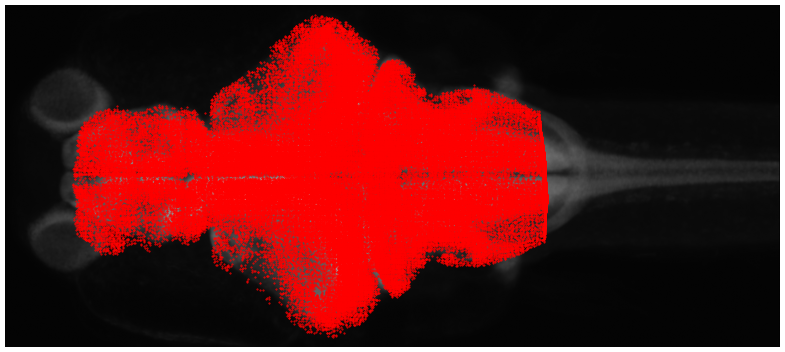

/Users/s/vault/neural_data/janelia/subject_06
found


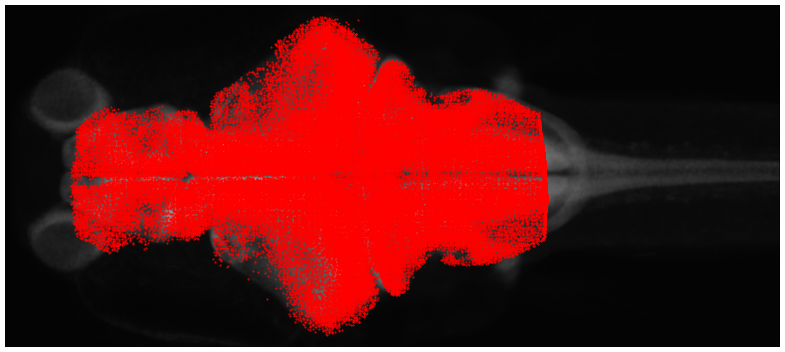

/Users/s/vault/neural_data/janelia/subject_16
16
found


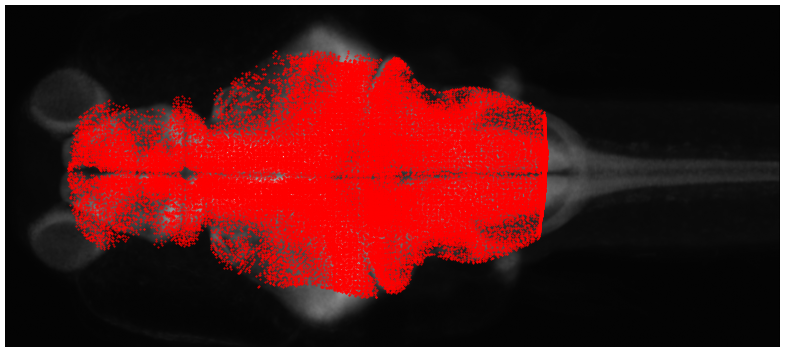

/Users/s/vault/neural_data/janelia/subject_17
17
found


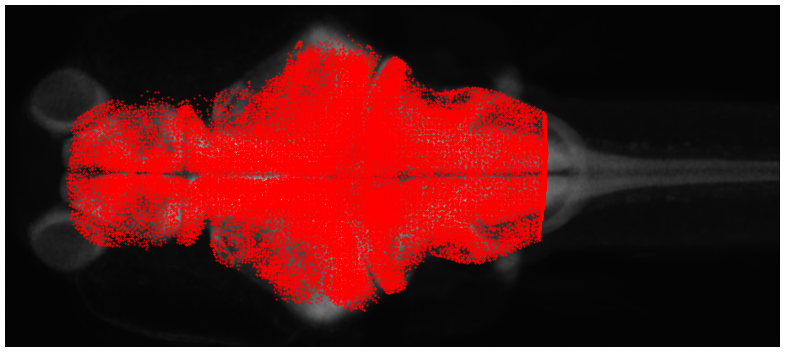

In [ ]:
reference_anat = scipy.io.loadmat('/Users/s/vault/neural_data/janelia/Additional_mat_files/ReferenceBrain.mat')

PATH = "/Users/s/vault/neural_data/janelia"
subject_id_list = [5, 6, 16, 17]

for subject_id in subject_id_list:

  h5_path = f"{PATH}/subject_{subject_id:02d}"
  print(h5_path)
  h5 = h5py.File(f"{h5_path}/TimeSeries.h5", "r")

  x = np.array(h5['CellResp']).astype(np.float32)
  abs_ix = h5['absIX']
  abs_ix = (abs_ix[0] - 1).astype(int)

  mat_path = f"{PATH}/subject_{subject_id:02d}/data_full.mat"
  data_struct = scipy.io.loadmat(mat_path)['data'][0, 0]

  all_cell_coordinates = data_struct[8]
  coordinates = all_cell_coordinates[abs_ix]

  behavioral_covariates = data_struct['Behavior_full'].T.astype(np.float32)

  if 'stimset' in data_struct.dtype.names:
    print(subject_id)
  if 'CellXYZ_norm' in data_struct.dtype.names:
    print('found')

  plt.figure(figsize=(10, 10))
  plt.imshow(np.sum(reference_anat['anat_stack_norm'], axis=-1).T, cmap='gray')
  plt.scatter(coordinates[::][:, 0], coordinates[::][:, 1], c='red', s=0.2)
  plt.axis('off')
  plt.show()